In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import requests as r
import altair as alt

In [4]:
#https://twitter.com/geokaramanis/status/1695702918635077705/photo/1

## Get original data
Getting the original data and saving it locally just to be safe

In [5]:
raw = r.get("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-22/population.csv")
raw.raise_for_status()

In [6]:
with open('data.csv', 'w') as file:
    file.write(raw.text)

In [7]:
with open('data.csv', 'r') as file:
    df = pd.read_csv(file)
df

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
0,2010,Afghanistan,AFG,AFG,Afghanistan,AFG,AFG,0,0,0,351907,3366,0,838250,NaN,NaN
1,2010,Iran (Islamic Rep. of),IRN,IRN,Afghanistan,AFG,AFG,30,21,0,0,0,0,0,NaN,NaN
2,2010,Iraq,IRQ,IRQ,Afghanistan,AFG,AFG,6,0,0,0,0,0,0,NaN,NaN
3,2010,Pakistan,PAK,PAK,Afghanistan,AFG,AFG,6398,9,0,0,0,0,0,NaN,NaN
4,2010,Egypt,ARE,EGY,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64804,2022,Venezuela (Bolivarian Republic of),VEN,VEN,Aruba,ABW,ABW,0,0,0,0,0,0,0,17000.0,0.0
64805,2022,Aruba,ABW,ABW,Aruba,ABW,ABW,0,0,0,0,0,0,0,NaN,1700.0
64806,2022,Venezuela (Bolivarian Republic of),VEN,VEN,Curacao,CUW,CUW,0,0,0,0,0,0,0,14000.0,0.0
64807,2022,Curacao,CUW,CUW,Curacao,CUW,CUW,0,0,0,0,0,0,0,NaN,1700.0


## Get country data
Getting country data to extract the european countries of arrival. Hard coded as during the lifetime of the code this propably won't change. Generated by ChatGPT

In [8]:
european_countries = {
    "Albania": "ALB",
    "Andorra": "AND",
    "Austria": "AUT",
    "Belarus": "BLR",
    "Belgium": "BEL",
    "Bosnia and Herzegovina": "BIH",
    "Bulgaria": "BGR",
    "Croatia": "HRV",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DNK",
    "Estonia": "EST",
    "Finland": "FIN",
    "France": "FRA",
    "Germany": "DEU",
    "Greece": "GRC",
    "Hungary": "HUN",
    "Iceland": "ISL",
    "Ireland": "IRL",
    "Italy": "ITA",
    "Kosovo": "XKX",
    "Latvia": "LVA",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Malta": "MLT",
    "Moldova": "MDA",
    "Monaco": "MCO",
    "Montenegro": "MNE",
    "Netherlands": "NLD",
    "North Macedonia": "MKD",
    "Norway": "NOR",
    "Poland": "POL",
    "Portugal": "PRT",
    "Romania": "ROU",
    "Russia": "RUS",
    "San Marino": "SMR",
    "Serbia": "SRB",
    "Slovakia": "SVK",
    "Slovenia": "SVN",
    "Spain": "ESP",
    "Sweden": "SWE",
    "Switzerland": "CHE",
    "Ukraine": "UKR",
    "United Kingdom": "GBR",
    "Vatican City": "VAT"
}

european_country_codes = list(european_countries.values())

print(european_country_codes)
len(european_country_codes)


['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT']


46

In [9]:
# Filter df that only the countries (coa_iso) which are in the eu_countries list are left
refugees_arrived_europe = df[df['coa_iso'].isin(european_country_codes)]
refugees_arrived_europe

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
4,2010,Egypt,ARE,EGY,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
5,2010,China,CHI,CHN,Albania,ALB,ALB,6,0,0,0,0,0,0,NaN,NaN
6,2010,Palestinian,GAZ,PSE,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
7,2010,Iraq,IRQ,IRQ,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
8,2010,Serbia and Kosovo: S/RES/1244 (1999),SRB,SRB,Albania,ALB,ALB,49,20,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64484,2022,Türkiye,TUR,TUR,Ukraine,UKR,UKR,7,6,0,0,0,0,0,NaN,0.0
64485,2022,Ukraine,UKR,UKR,Ukraine,UKR,UKR,0,0,0,5914000,0,0,497343,NaN,0.0
64486,2022,Uzbekistan,UZB,UZB,Ukraine,UKR,UKR,37,14,0,0,0,0,0,NaN,0.0
64487,2022,Yemen,YEM,YEM,Ukraine,UKR,UKR,5,5,0,0,0,0,0,NaN,0.0


In [31]:
# Group by country of origin and sum up the refugees
refugees_arrived_europe_per_coo = refugees_arrived_europe.groupby(['coo_name']).sum()
refugees_arrived_europe_per_coo.refugees

coo_name
Afghanistan       2753800
Albania            128636
Algeria             52665
Angola             105019
Anguilla                5
                   ...   
Viet Nam           229448
Western Sahara       5792
Yemen               69294
Zambia               1302
Zimbabwe           110160
Name: refugees, Length: 193, dtype: int64

## Prepare the dataset that it's much more simple
Pivot the table that it is in a form where it's usable to plot and understandable.


In [33]:
refugees_agg = refugees_arrived_europe.groupby(['year', 'coo_name'])['refugees'].sum().reset_index()
pivot_df = refugees_agg.pivot(index='year', columns='coo_name', values='refugees')
pivot_df

coo_name,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Unknown,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2010,99141.0,6512.0,5314.0,13737.0,NaN,0.0,37.0,10589.0,33.0,5.0,...,145292.0,20.0,4597.0,NaN,69.0,36535.0,5.0,1158.0,42.0,15484.0
2011,93460.0,6360.0,5048.0,12476.0,NaN,NaN,41.0,10913.0,33.0,5.0,...,122533.0,19.0,4797.0,NaN,98.0,35747.0,34.0,1376.0,52.0,15794.0
2012,93178.0,6286.0,4753.0,10392.0,NaN,0.0,43.0,11510.0,36.0,10.0,...,107912.0,14.0,4883.0,NaN,114.0,34978.0,72.0,1588.0,65.0,12669.0
2013,93701.0,4755.0,2864.0,7397.0,NaN,NaN,26.0,8385.0,21.0,NaN,...,88085.0,5.0,2845.0,NaN,95.0,12286.0,115.0,1349.0,64.0,10749.0
2014,107912.0,5774.0,2839.0,6727.0,NaN,NaN,24.0,8692.0,21.0,NaN,...,95292.0,5.0,2817.0,NaN,122.0,11770.0,213.0,1486.0,79.0,9909.0
2015,119913.0,6870.0,2839.0,6427.0,NaN,NaN,17.0,8492.0,15.0,NaN,...,115511.0,5.0,2314.0,NaN,167.0,11461.0,331.0,1913.0,126.0,9473.0
2016,162507.0,8375.0,3096.0,6191.0,NaN,NaN,23.0,8542.0,15.0,NaN,...,130712.0,5.0,2209.0,NaN,228.0,11456.0,461.0,2827.0,102.0,9286.0
2017,239275.0,9697.0,3384.0,6023.0,NaN,0.0,29.0,8955.0,10.0,5.0,...,149332.0,0.0,1884.0,NaN,503.0,11503.0,552.0,4585.0,107.0,8852.0
2018,282687.0,10998.0,3479.0,5853.0,NaN,5.0,36.0,9236.0,10.0,5.0,...,157377.0,0.0,1725.0,NaN,1257.0,11620.0,624.0,6437.0,119.0,7499.0


## Only countries with less than 100'000 refugees in total

In [36]:
column_sum = pivot_df.sum()
filtered_columns = pivot_df.columns[column_sum > 100000]
df_filtered = pivot_df[filtered_columns]
df_filtered = df_filtered[df_filtered.sum().sort_values(ascending=False).index]
df_filtered

coo_name,Syrian Arab Rep.,Ukraine,Afghanistan,Iraq,Eritrea,Unknown,Somalia,Iran (Islamic Rep. of),Türkiye,Russian Federation,...,Bangladesh,Cote d'Ivoire,Albania,Armenia,Azerbaijan,Palestinian,Zimbabwe,Angola,Libya,Gambia
year,,,,,,,,,,,,,,,,,,,,,
2010,16799.0,21665.0,99141.0,146359.0,43948.0,145292.0,85913.0,47115.0,125822.0,96880.0,...,6012.0,7287.0,6512.0,10589.0,12425.0,3502.0,15484.0,13737.0,1922.0,1395.0
2011,18045.0,22033.0,93460.0,139930.0,51151.0,122533.0,88721.0,49384.0,119540.0,99316.0,...,6217.0,7759.0,6360.0,10913.0,12659.0,3633.0,15794.0,12476.0,2407.0,1614.0
2012,35634.0,22027.0,93178.0,126288.0,56194.0,107912.0,90438.0,51843.0,115138.0,100718.0,...,6509.0,8481.0,6286.0,11510.0,12608.0,3928.0,12669.0,10392.0,4189.0,1940.0
2013,66468.0,2097.0,93701.0,112762.0,65209.0,88085.0,94001.0,50270.0,46727.0,65090.0,...,6257.0,8730.0,4755.0,8385.0,8161.0,4016.0,10749.0,7397.0,2572.0,2148.0
2014,138594.0,234591.0,107912.0,113554.0,81076.0,95292.0,91598.0,53509.0,43483.0,61955.0,...,6947.0,9267.0,5774.0,8692.0,8095.0,4589.0,9909.0,6727.0,3266.0,3719.0
2015,278006.0,317670.0,119913.0,126807.0,108767.0,115511.0,91573.0,56738.0,41064.0,58816.0,...,8503.0,9786.0,6870.0,8492.0,7564.0,5091.0,9473.0,6427.0,4926.0,6930.0
2016,654252.0,235395.0,162507.0,172756.0,144695.0,130712.0,97072.0,64510.0,39634.0,55342.0,...,10996.0,10421.0,8375.0,8542.0,7597.0,6228.0,9286.0,6191.0,6703.0,9965.0
2017,815731.0,135652.0,239275.0,211636.0,171199.0,149332.0,108349.0,85531.0,41760.0,54240.0,...,13618.0,11415.0,9697.0,8955.0,8236.0,7398.0,8852.0,6023.0,8625.0,12905.0
2018,888363.0,88666.0,282687.0,220437.0,181837.0,157377.0,108884.0,93355.0,46931.0,53759.0,...,17364.0,13221.0,10998.0,9236.0,8445.0,8639.0,7499.0,5853.0,10863.0,15579.0


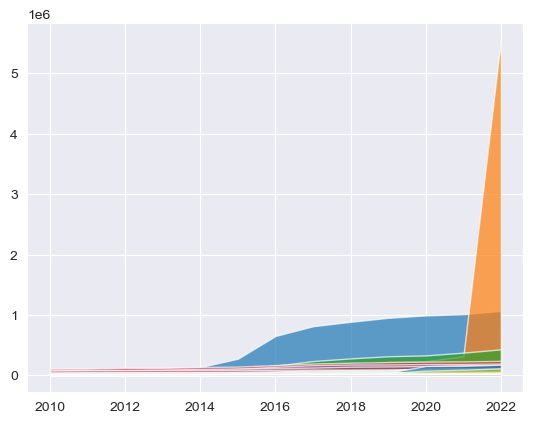

In [37]:
fig, ax = plt.subplots()
x = df_filtered.index
for colname in df_filtered.columns:
    y = df_filtered[colname]
    y_sorted = y.sort_values(ascending=True)

    # Fill between the sorted values
    ax.fill_between(x, y_sorted, label=colname, alpha=0.7)
plt.show()

In [38]:
df_alt = df_filtered.reset_index()
df_alt = df_alt.melt(id_vars='year', var_name='Country', value_name='Value')

# Create a stream graph using Altair
stream_graph = alt.Chart(df_alt).mark_area(interpolate='step').encode(
    x=alt.X('year', axis=alt.Axis(title='Year')),
    y=alt.Y('sum(Value):Q', axis=alt.Axis(title='Value')),
    color=alt.Color('Country:N', sort='ascending', legend=alt.Legend(title='Countries')),
    order='Value:O',
).properties(
    width=600,
    height=300
)

stream_graph

alt.Chart(...)

In [39]:
df_alt


,year,Country,Value
0,2010,Syrian Arab Rep.,16799.0
1,2011,Syrian Arab Rep.,18045.0
2,2012,Syrian Arab Rep.,35634.0
3,2013,Syrian Arab Rep.,66468.0
4,2014,Syrian Arab Rep.,138594.0
...,...,...,...
463,2018,Gambia,15579.0
464,2019,Gambia,16183.0
465,2020,Gambia,9006.0
466,2021,Gambia,9528.0
